In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


AUC


,5e-4_qval
high_tfx,0.94974
low_tfx,0.71429
overall,0.91070


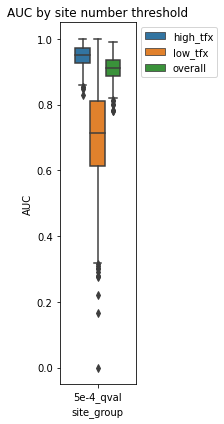

In [2]:
site_groups = ['5e-4_qval']
metric = 'AUC'

boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv(site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['high_tfx','low_tfx','overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    boxplot_data = boxplot_data.append(current)

fig,ax = plt.subplots(figsize = (3,6))
sns.boxplot(x = boxplot_data['site_group'],
            y = boxplot_data[metric],
            hue = boxplot_data['group'],
           width = 0.6,
           order = site_groups,
           ax = ax)

plt.legend(bbox_to_anchor = [1,1], loc = 'upper left');
plt.ylim(-0.05,1.05)
plt.tight_layout()
plt.title(metric+' by site number threshold')
fig.tight_layout()
plt.savefig(metric+'_threshold_plot.pdf')

metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = df.groupby('group')[metric].median().copy()

print(metric)
metrics_df

accuracy


,5e-4_qval
high_tfx,0.89744
low_tfx,0.66667
overall,0.83333


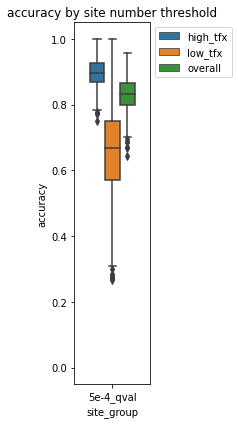

In [3]:
metric = 'accuracy'

boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv(site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['high_tfx','low_tfx','overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    boxplot_data = boxplot_data.append(current)

fig,ax = plt.subplots(figsize = (3,6))
sns.boxplot(x = boxplot_data['site_group'],
            y = boxplot_data[metric],
            hue = boxplot_data['group'],
           width = 0.6,
           order = site_groups,
           ax = ax)

plt.legend(bbox_to_anchor = [1,1], loc = 'upper left');
plt.ylim(-0.05,1.05)
plt.tight_layout()
plt.title(metric+' by site number threshold')
fig.tight_layout()
plt.savefig(metric+'_threshold_plot.pdf')

metrics_df = pd.DataFrame(index = boxplot_data['group'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = df.groupby('group')[metric].median().copy()

print(metric)
metrics_df

In [4]:
import os
os.getcwd()

'/fh/fast/ha_g/user/adoebley/projects/griffin_revisions_1/MBC/CNA_correction_100kb_ATAC_np/analysis'